2차원  
y(x,y) = x[x,y] * h[m,n]  
LPF -> 블러링  
HPF -> 경계가 극단적인 샤프닝

대부분 다 대칭의 형태이다.  
그래서 컨볼루션? filtering때 안뒤집어도 됨??  

3x3

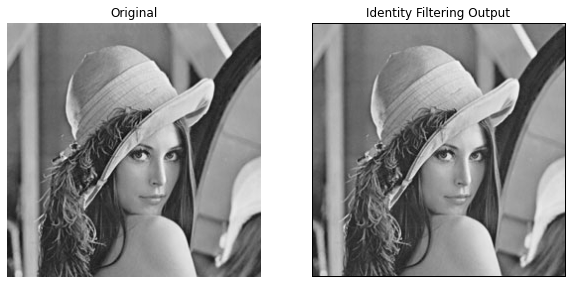

In [9]:
import numpy as np
from scipy import signal, misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from scipy import ndimage
import imageio

#Image Read
lena = imread('./영상샘플/lena_256.bmp')
row, col = lena.shape
FilterSize = 3 #3x3 필터 사이즈

Filter = np.array([[0,0,0],[0,1,0],[0,0,0]])
# 000 2층 010 3층 000 (가운데만 1인 3x3) 임펄스를 2차원으로 만든것과 같다.
# x[n] * 임펄스 델타[n] = x[n] 자기자신
# Image(x,y) * 위의 Filter = Image(x,y) -> Identity Filter

SUM = np.sum(Filter)

ImageOut = np.zeros(shape=(row,col), dtype=np.uint8)

for y in range(1, col-1):
    for x in range(1, row-1):
        buff = lena[y-1:y+2, x-1:x+2] #lena에서 3x3
        pixel = np.uint8(np.sum(buff * Filter)/SUM)
        ImageOut[y,x] = pixel
        
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(lena), plt.title('Original'),
plt.gray(),plt.axis('off')

plt.subplot(122), plt.imshow(ImageOut), plt.title('Identity Filtering Output')
plt.gray(),plt.axis('off')
plt.show()

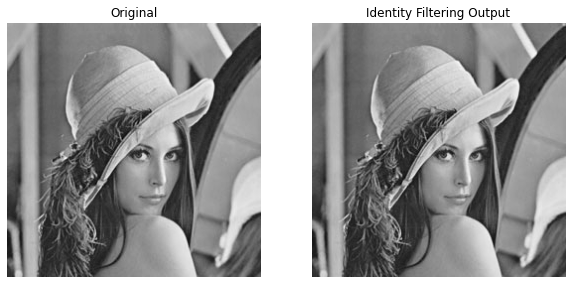

In [9]:
#Image Read
lena = imread('./영상샘플/lena_256.bmp')
row, col = lena.shape
FilterSize = 3 #3x3 필터 사이즈
Padding = int(FilterSize/2)

Filter = np.array([[0,0,0],[0,1,0],[0,0,0]])
# 000 2층 010 3층 000 (가운데만 1인 3x3) 임펄스를 2차원으로 만든것과 같다.
# x[n] * 임펄스 델타[n] = x[n] 자기자신
# Image(x,y) * 위의 Filter = Image(x,y) -> Identity Filter

SUM = np.sum(Filter)

ImageBuffer = np.zeros(shape=(row+2*Padding,col+2*Padding),dtype=np.uint8)
ImageOut = np.zeros(shape=(row,col), dtype=np.uint8)
ImageBuffer[Padding:col+Padding, Padding:row+Padding] = lena[:,:]

for y in range(Padding, col+Padding):
    for x in range(Padding, row+Padding):
        buff = ImageBuffer[y-Padding:y+Padding+1, x-Padding:x+Padding+1]
        pixel = np.uint8(np.sum(buff * Filter)/SUM)
        ImageOut[y-Padding,x-Padding] = pixel
        
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(lena), plt.title('Original'),
plt.gray(),plt.axis('off')

plt.subplot(122), plt.imshow(ImageOut), plt.title('Identity Filtering Output')
plt.gray(),plt.axis('off')
plt.show()

In [4]:
# 1-D Gaussian
Filtersize = 256
sigma = 50.0
G1 = np.zeros(shape=(FilterSize), dtype=np.float64)
for x in range(-127, 128):
    s = 1/(np.sqrt(2*np.pi)*sigma)
    v = - (pow(x,2)/ (2*pow(sigma,2)))
    G1[x+127] = s*np.exp(v)

plt.plot(G1), plt.title('1-D Gassian')
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

 6p 가우시안 그림 그리기. -4~4

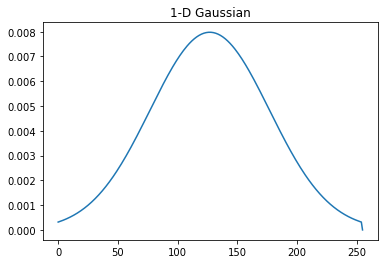

In [9]:
import numpy as np
from scipy import signal, misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from scipy import ndimage
import imageio

#1-D Gaussian
FilterSize = 256
sigma = 50.0
G1 = np.zeros(shape=(FilterSize), dtype=np.float64)
for x in range(-127, 128):
    s = 1/(np.sqrt(2*np.pi)*sigma)
    v = -(pow(x,2)/(2*pow(sigma,2)))
    G1[x+127] = s*np.exp(v)

plt.plot(G1), plt.title('1-D Gaussian')
plt.show()

In [11]:
FilterSize = 9
sigma = 1.0
G = np.zeros(shape=(FilterSize,FilterSize), dtype=np.float64)

for y in range(-4,5):
    for x in range(-4,5):
        s = 1/(2*np.pi*pow(sigma,2))
        v = -(pow(y,2)+pow(x,2))/(2*pow(sigma,2))
        G[y+4, x+4] = s*np.exp(v)
        print('{:.4f}'.format(G[y+4,x+4]), end=' ')
    print("")

0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 
0.0000 0.0000 0.0002 0.0011 0.0018 0.0011 0.0002 0.0000 0.0000 
0.0000 0.0002 0.0029 0.0131 0.0215 0.0131 0.0029 0.0002 0.0000 
0.0000 0.0011 0.0131 0.0585 0.0965 0.0585 0.0131 0.0011 0.0000 
0.0001 0.0018 0.0215 0.0965 0.1592 0.0965 0.0215 0.0018 0.0001 
0.0000 0.0011 0.0131 0.0585 0.0965 0.0585 0.0131 0.0011 0.0000 
0.0000 0.0002 0.0029 0.0131 0.0215 0.0131 0.0029 0.0002 0.0000 
0.0000 0.0000 0.0002 0.0011 0.0018 0.0011 0.0002 0.0000 0.0000 
0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 


0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 
0.0000 0.0000 0.0002 0.0011 0.0018 0.0011 0.0002 0.0000 0.0000 
0.0000 0.0002 0.0029 0.0131 0.0215 0.0131 0.0029 0.0002 0.0000 
0.0000 0.0011 0.0131 0.0585 0.0965 0.0585 0.0131 0.0011 0.0000 
0.0001 0.0018 0.0215 0.0965 0.1592 0.0965 0.0215 0.0018 0.0001 
0.0000 0.0011 0.0131 0.0585 0.0965 0.0585 0.0131 0.0011 0.0000 
0.0000 0.0002 0.0029 0.0131 0.0215 0.0131 0.0029 0.0002 0.0000 
0.0000 0.0000 0.0002 0.0011 0.0018 0.0011 0.0002 0.0000 0.0000 
0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 
0.9999940394918845


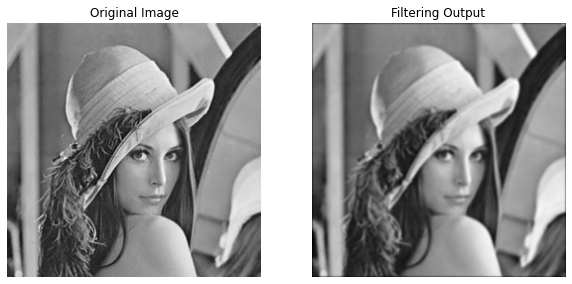

In [17]:
#시그마가 값이 커지면 넓게 펴지고, 작으면 좁게 퍼진다. (블러링)

FilterSize = 9
sigma = 1.0 #(0.5)부터 5.0 까지 바꿔가며 그림 비교
G = np.zeros(shape=(FilterSize,FilterSize), dtype=np.float64)

for y in range(-4,5):
    for x in range(-4,5):
        s = 1/(2*np.pi*pow(sigma,2))
        v = -(pow(y,2)+pow(x,2))/(2*pow(sigma,2))
        G[y+4, x+4] = s*np.exp(v)
        print('{:.4f}'.format(G[y+4,x+4]), end=' ')
    print("")

print(np.sum(G))

# Image Read
lena = imread('./영상샘플/lena_256.bmp')
col, row = lena.shape
Padding = int(FilterSize/2)

ImageBuffer = np.zeros(shape=(row+(2*Padding), col+(2*Padding)), dtype = np.uint8) 
ImageOut = np.zeros(shape=(row, col), dtype = np.uint8)
ImageBuffer[Padding:col+Padding, Padding:row+Padding] = lena[:,:]


for y in range(Padding, col+Padding):
    for x in range(Padding, row+Padding):
        buff = ImageBuffer[y-Padding:y+Padding+1, x-Padding:x+Padding+1]
        pixel = np.uint8((np.sum(buff*G)))
        ImageOut[y-Padding, x-Padding] = pixel

plt.figure(figsize=(10, 10))        
plt.subplot(121), plt.imshow(lena), plt.gray(), plt.axis('off')
plt.title('Original Image')
plt.subplot(122), plt.imshow(ImageOut), plt.gray(), plt.axis('off')
plt.title('Filtering Output')
plt.show()

### 마 Unsharp Mask 필터

mean 필터, 가우시안 필터, 뭐시기 필터

2. 라플라시안 필터 극단적인 고주파 필터. 저주파 다 날리고 Edge(경계)만 남기는 것.  
다른말로 하면 미분 필터.


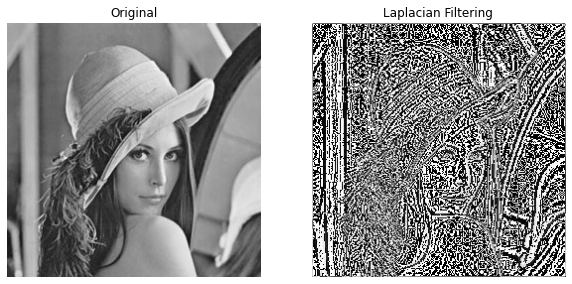

In [27]:
#Image Read
lena = imread('./영상샘플/lena_256.bmp')
row, col = lena.shape
FilterSize = 3 #3x3 필터 사이즈
Padding = int(FilterSize/2)

Filter = np.array([[0,1,0],[1,-4,1],[0,1,0]])
#Filter = np.array([[1,1,1],[1,-8,1],[1,1,1]])

ImageBuffer = np.zeros(shape=(row+2*Padding,col+2*Padding),dtype=np.float64)
ImageOut = np.zeros(shape=(row,col), dtype=np.float64)
ImageBuffer[Padding:col+Padding, Padding:row+Padding] = np.float64(lena[:,:])

for y in range(Padding, col+Padding):
    for x in range(Padding, row+Padding):
        buff = ImageBuffer[y-Padding:y+Padding+1, x-Padding:x+Padding+1]
        pixel = np.sum(buff * Filter)
        ImageOut[y-Padding,x-Padding] = pixel
        
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(lena), plt.title('Original'),
plt.gray(),plt.axis('off')

plt.subplot(122), plt.imshow(np.uint8(ImageOut)), plt.title('Laplacian Filtering')
plt.gray(),plt.axis('off')
plt.show()

# 23.12.06

C:\Users\user\AppData\Local\Temp/ipykernel_15700/3380370003.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 255
C:\Users\user\AppData\Local\Temp/ipykernel_15700/3380370003.py:36: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


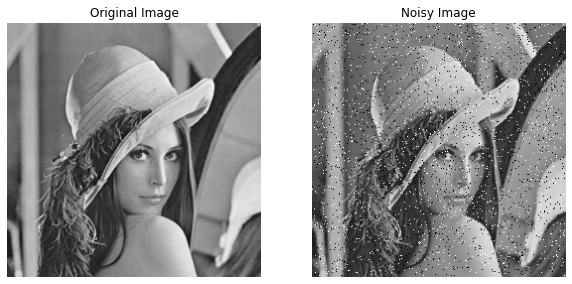

In [34]:
import numpy as np
from scipy import signal, misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from scipy import ndimage
import imageio


def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row, col = image.shape
        mean = 0
        var = 0.5
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col))
        gauss = gauss.reshape(row,col)
        noisy = image + 10.0*gauss
        return noisy

    elif noise_typ == "s&p":
        row,col = image.shape
        s_vs_p = 0.5
        amount = 0.05
        out = np.copy(image)
 
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
        out[coords] = 255
        #out[tuple(coords)]=255

        
        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
        out[coords] = 0
        #out[tuple(coords)]=0
        return out
        
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * 10.0*vals) / float(vals)
        return noisy
    
    elif noise_typ =="speckle":
        row,col = image.shape
        gauss = np.random.randn(row,col)
        gauss = gauss.reshape(row,col)
        noisy = image + image * 0.1*gauss
        return noisy
        

lena = imread('./영상샘플/lena_256.bmp')
col, row = lena.shape
IM = noisy("s&p",lena)
# IM = noisy("poisson",lena) 푸아송 잡음
# IM = noisy("speckle",lena) 스펙클 잡음
# IM = noisy("s&p", lena)

plt.figure(figsize=(10, 10))        
plt.subplot(121), plt.imshow(lena), plt.gray(), plt.axis('off')
plt.title('Original Image')
plt.subplot(122), plt.imshow(IM), plt.gray(), plt.axis('off')
plt.title('Noisy Image')
plt.show()

# 잡음을 제거 불가. 잡음을 추정해야함. 가정하고 미리 가우시안을 만든다음에 빼야함.

위의 잡음을 제거하기 위한 방법 :  미디언(median) 필터링

(d) (c)의 잡음영상을 미디언 필터링을 수행하여 잡음을 제거하고 그 결과를 화면에 출력하
시오

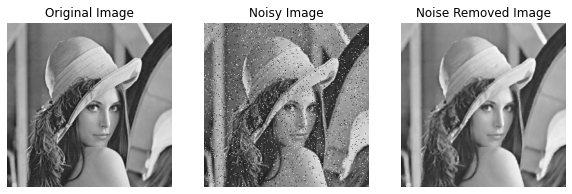

In [35]:
# IM = 소금 후추 - 0.05 (5%)만 준 경우. 미디언 필터링 

# amount = 0.1 & 0.3 이면 missing 되는 부분이 생김.  

FilterSize = 3 #3x3 필터 사이즈
Padding = int(FilterSize/2)

ImageBuffer = np.zeros(shape=(row+2*Padding,col+2*Padding),dtype=np.uint8)
ImageOut = np.zeros(shape=(row,col), dtype=np.uint8)
ImageBuffer[Padding:col+Padding, Padding:row+Padding] =IM[:,:]

# 잡음 영역에서 3x3 갖고오기
for y in range(Padding, col+Padding):
    for x in range(Padding, row+Padding):
        buff = ImageBuffer[y-Padding:y+Padding+1, x-Padding:x+Padding+1]
        value = np.sort(buff, axis=None)
        pixel = value[4] #3x3일경우 가운데 index4 값 넣기
        ImageOut[y-Padding,x-Padding] = pixel
        
plt.figure(figsize=(10, 10))        
plt.subplot(131), plt.imshow(lena), plt.gray(), plt.axis('off')
plt.title('Original Image')
plt.subplot(132), plt.imshow(IM), plt.gray(), plt.axis('off')
plt.title('Noisy Image')
plt.subplot(133), plt.imshow(ImageOut), plt.gray(), plt.axis('off')
plt.title('Noise Removed Image')
plt.show()